<a href="https://colab.research.google.com/github/Preteka/Deep-Learning-Lab/blob/main/dl5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 86ms/step - accuracy: 0.3112 - loss: 1.8581 - val_accuracy: 0.5372 - val_loss: 1.2787
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 82ms/step - accuracy: 0.5241 - loss: 1.3398 - val_accuracy: 0.6021 - val_loss: 1.1181
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.5855 - loss: 1.1757 - val_accuracy: 0.6404 - val_loss: 1.0226
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.6385 - loss: 1.0320 - val_accuracy: 0.6623 - val_loss: 0.9628
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.6700 - loss: 0.9466 - val_accuracy: 0.6855 - val_loss: 0.9051
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.7000 - loss: 0.8619 - val_accuracy: 0.6977 - val_loss: 0.8797
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.7268 - loss: 0.7911 - val_accuracy: 0.7090 - val_loss: 0.8483
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.7398 - loss: 0.7444 - 

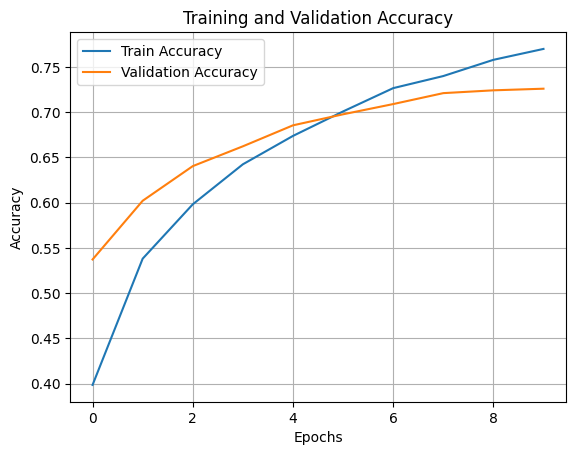

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1️⃣ Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values (0–1 range)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 2️⃣ Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)  # 10 classes for CIFAR-10
])

# 3️⃣ Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 4️⃣ Train model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels),
                    batch_size=64)

# 5️⃣ Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")

# 6️⃣ Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.show()
